In [1]:
import nc_time_axis
import warnings

import xarray as xr
import numpy as np
import pandas as pd
from importlib import reload

import matplotlib.pyplot as plt
import classes
import os
import sys

warnings.filterwarnings('ignore')

In [2]:
sys.path.append(os.path.join(os.getcwd(), 'Documents', 'PhD'))

In [16]:
import constants
sys.path.append(constants.MODULE_DIR)
import utils

# Open Data

In [6]:
experiment_params = constants.EXPERIMENTS_TO_RUN[0]
experiment_params

{'variable': 'tas', 'mask': None, 'hemisphere': 'global'}

In [29]:
ROOT_DIR_EXP = os.path.join(constants.LONGRUNMIP_DIR, experiment_params['variable'], 'regrid_retimestamped')
ROOT_DIR_EXP

'/g/data/w40/ab2313/PhD/longrunmip/tas/regrid_retimestamped'

In [78]:
ROOT_DIR_SPLINE = os.path.join(constants.LONGRUNMIP_DIR, experiment_params['variable'], 'log_cubic_spline', 'raw')
ROOT_DIR_SPLINE

'/g/data/w40/ab2313/PhD/longrunmip/tas/log_cubic_spline/raw'

In [79]:
nc_files_spline = os.listdir(ROOT_DIR_SPLINE)
utils.pprint_list(nc_files_SPLINE, num_start_items=5)

length = 15
0. tas_mon_ECHAM5MPIOM_abrupt4x_1001_g025.nc
1. tas_mon_ECEARTH_abrupt4x_150_g025.nc
2. tas_ann_UKESM_abrupt4x.nc
3. tas_ann_HadGEM2_abrupt4x_1299_g025.nc
4. tas_mon_GISSE2R_abrupt4x_5001_g025.nc


In [80]:
nc_files_exp = os.listdir(ROOT_DIR_EXP)
utils.pprint_list(nc_files_exp, num_start_items=5)

length = 35
0. tas_ann_HadGEM2_control_239_g025.nc
1. tas_mon_HadCM3L_control_1000_g025.nc
2. tas_mon_GFDLCM3_control_5200_g025.nc
3. tas_mon_ECHAM5MPIOM_abrupt4x_1001_g025.nc
4. tas_mon_CCSM3_control_1530_g025.nc


In [81]:
# Select a random file
fname_spline = nc_files_spline[0]
fname_spline

'tas_mon_ECHAM5MPIOM_abrupt4x_1001_g025.nc'

In [82]:
# Get the matching model for the spline
fname_exp = [f for f in nc_files_exp if ('abrupt' in f and fname_spline.split('_')[2].lower() in f.lower())][0]
fname_exp

'tas_mon_ECHAM5MPIOM_abrupt4x_1001_g025.nc'

In [83]:
# Open the file
ds_spline = xr.open_dataset(os.path.join(ROOT_DIR_SPLINE, fname_spline)).isel(time=slice(None, 999))
ds_exp = xr.open_dataset(os.path.join(ROOT_DIR_EXP, fname_exp)).isel(time=slice(None, 999))

In [84]:
# Currently the splines have just an integer time. Need to override the time in then spline file so that 
# it match the time in the exp file
ds_spline['time'] = ds_exp.time.values

In [103]:
ds_exp

<xarray.Dataset>
Dimensions:  (time: 150, lat: 72, lon: 144)
Coordinates:
  * time     (time) object 0001-12-31 00:00:00 ... 0150-12-31 00:00:00
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
Data variables:
    tas      (time, lat, lon) float32 ...

In [102]:
ds_spline

<xarray.Dataset>
Dimensions:  (lon: 144, lat: 72, time: 150)
Coordinates:
  * lon      (lon) float64 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * lat      (lat) float64 -88.75 -86.25 -83.75 -81.25 ... 83.75 86.25 88.75
  * time     (time) object 0001-12-31 00:00:00 ... 0150-12-31 00:00:00
Data variables:
    tas      (time, lat, lon) float32 ...

# Plotting

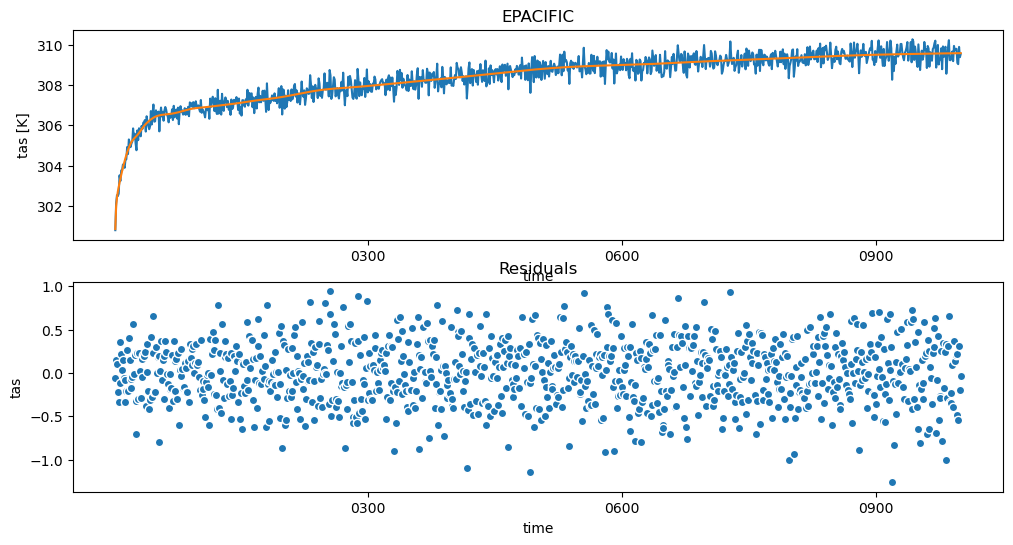

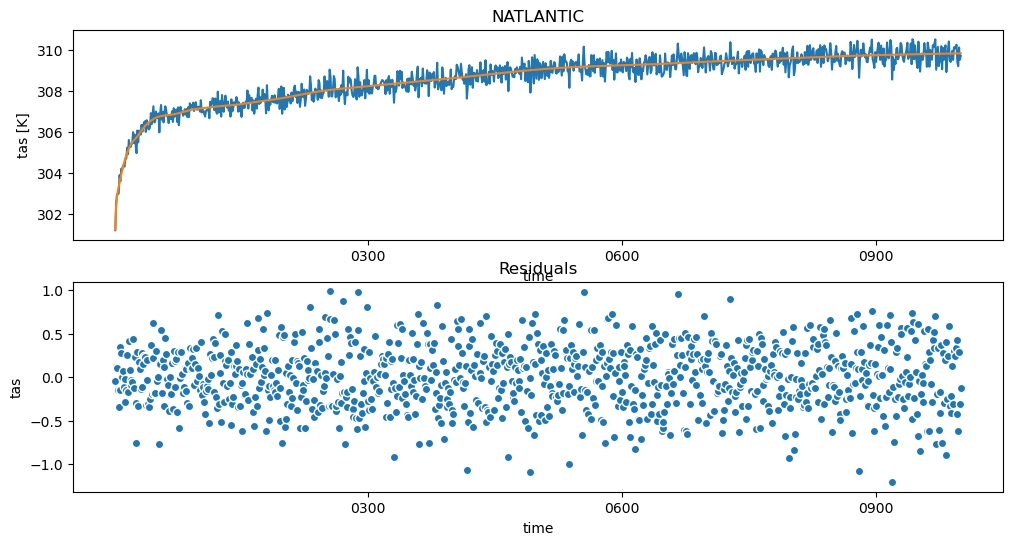

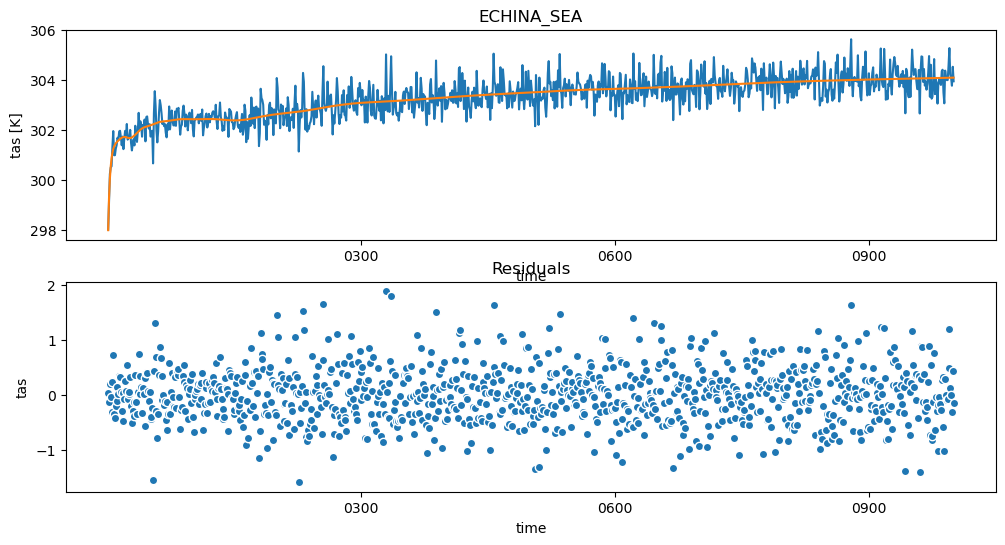

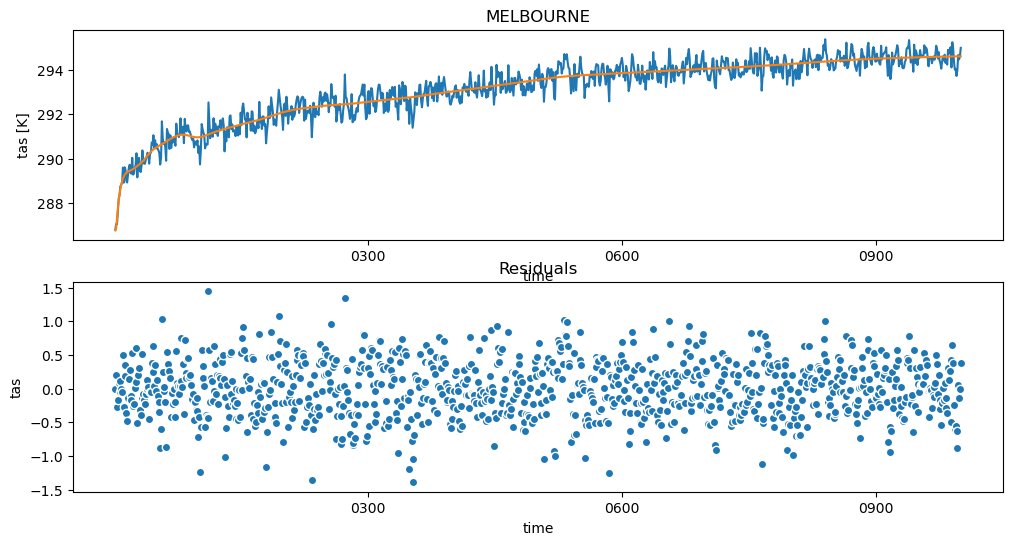

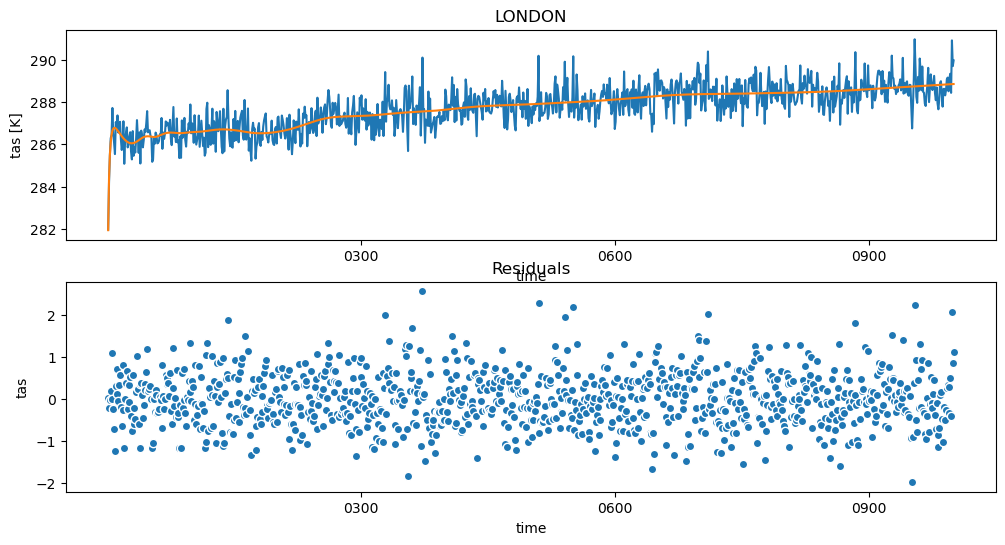

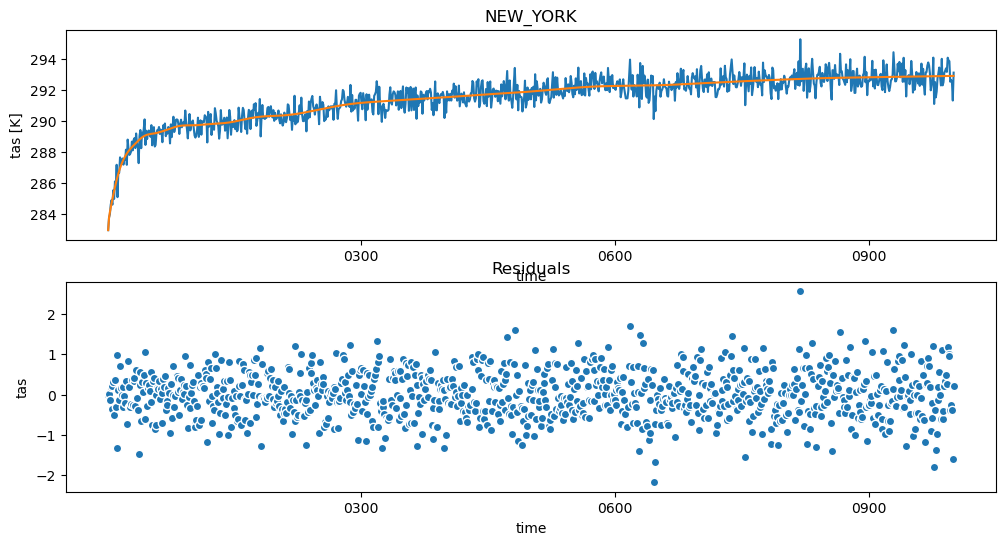

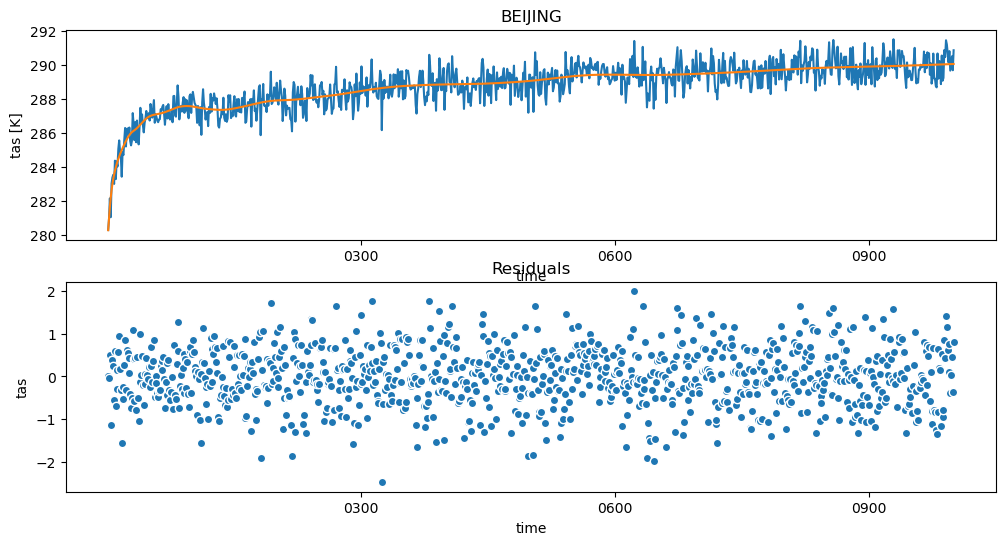

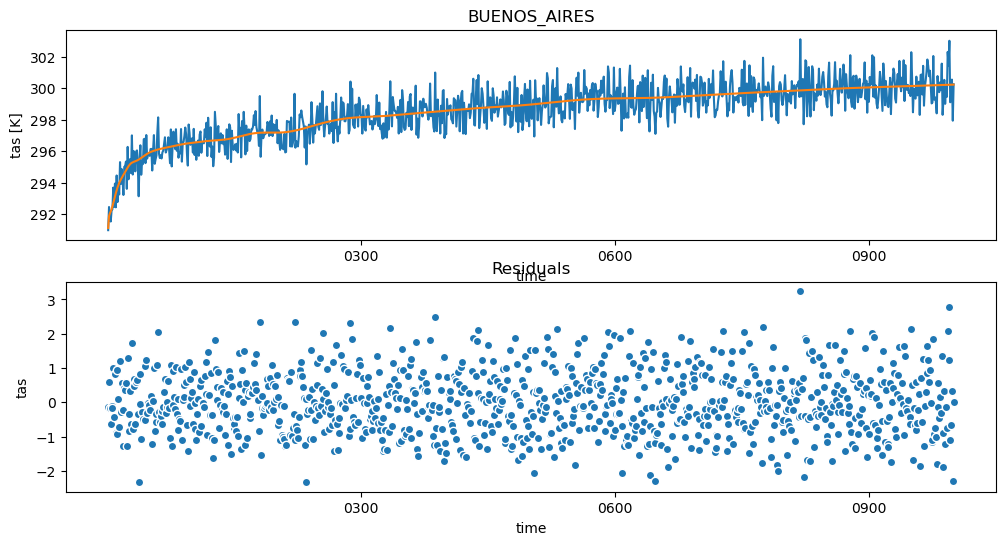

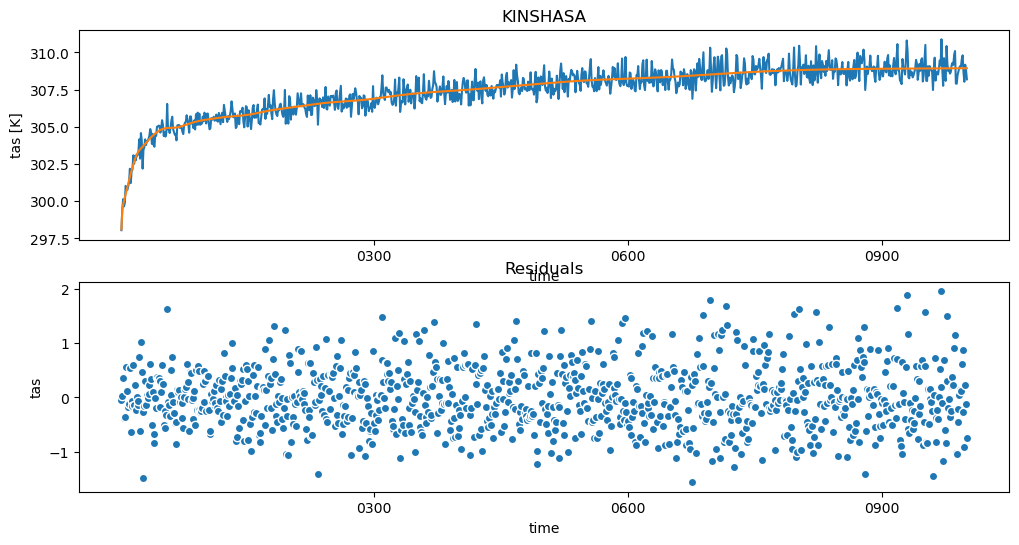

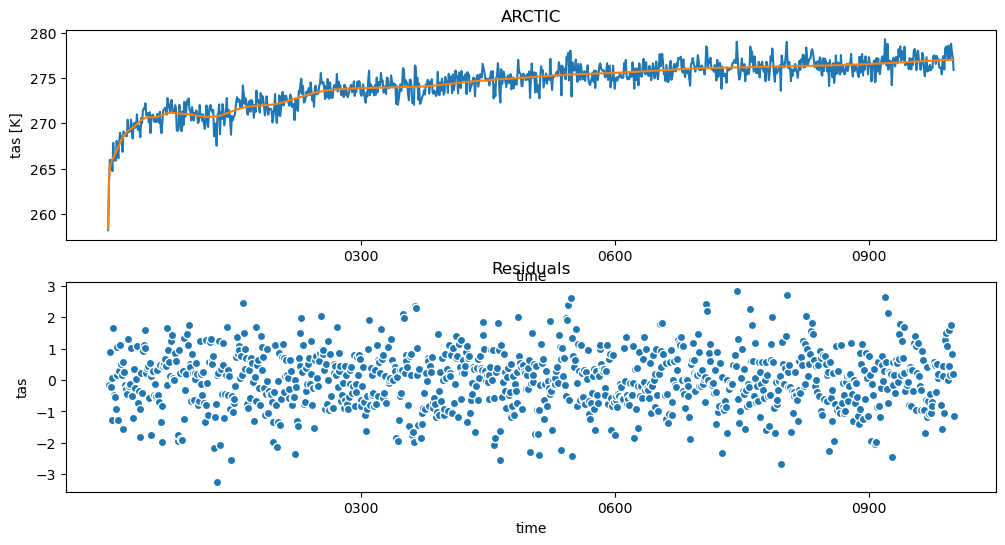

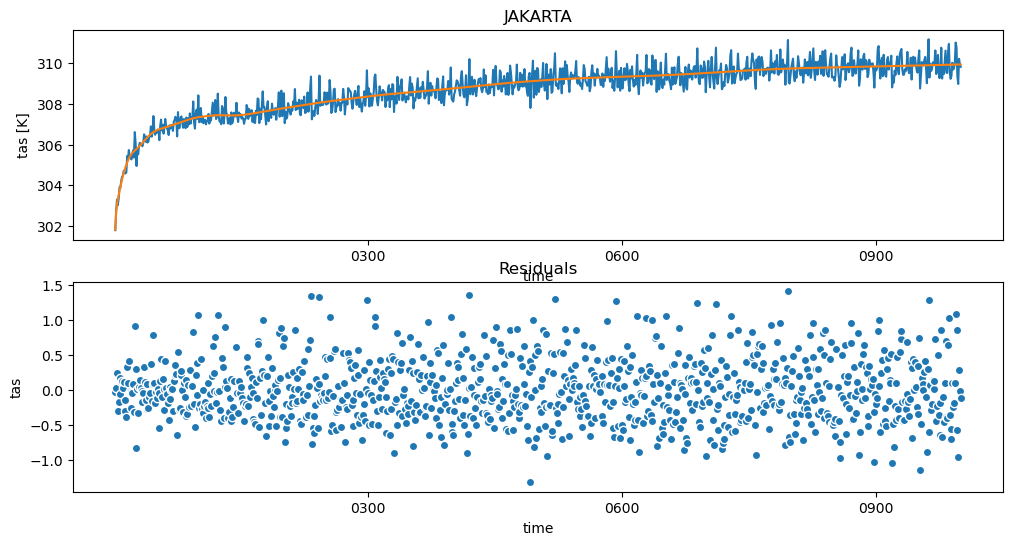

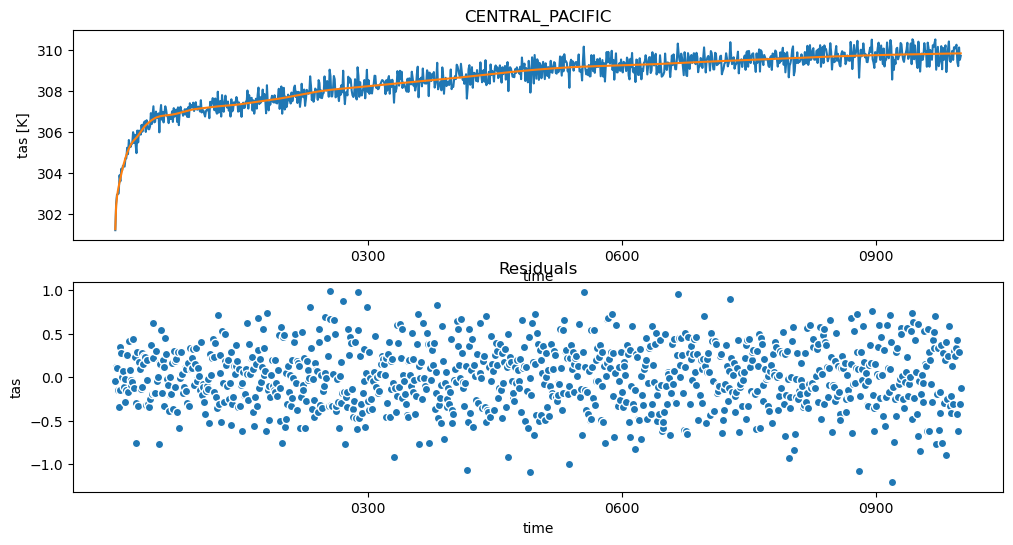

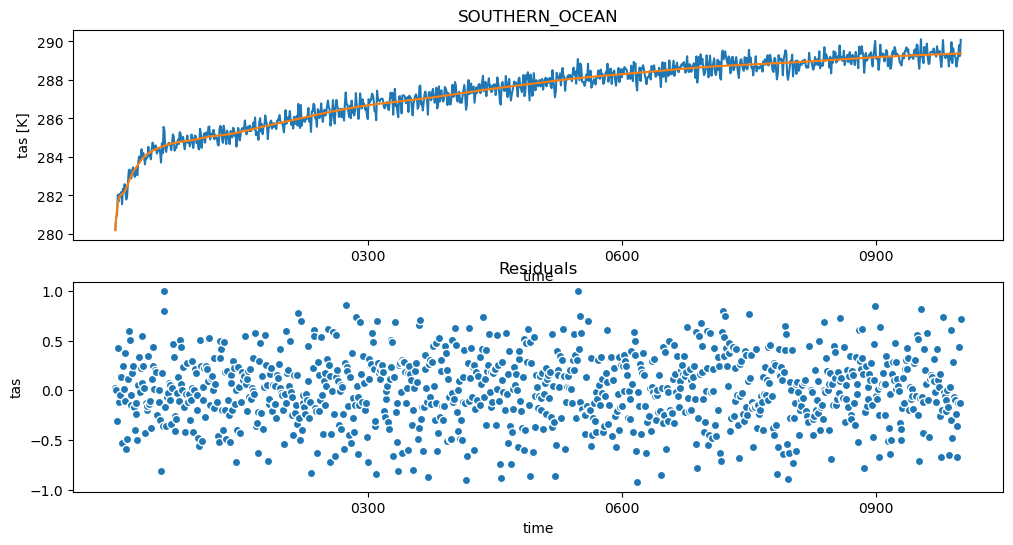

In [87]:
for loclaton in classes.LocationsLatLon:
    fig, axes = plt.subplots(2, 1, figsize=(12, 6))
    sel_dict = dict(lat=loclaton.value[0], lon=loclaton.value[1], method='nearest')
    ds_exp.tas.sel(**sel_dict).plot(ax=axes[0])
    ds_spline.tas.sel(**sel_dict).plot(ax=axes[0])
    (ds_exp-ds_spline).tas.sel(**sel_dict).plot.scatter(ax=axes[1])
    axes[0].set_title(loclaton.name)
    axes[1].set_title('Residuals')

# Time Over Riding

In [88]:
nc_files_spline = os.listdir(ROOT_DIR_SPLINE)
utils.pprint_list(nc_files_SPLINE, num_start_items=5)

length = 15
0. tas_mon_ECHAM5MPIOM_abrupt4x_1001_g025.nc
1. tas_mon_ECEARTH_abrupt4x_150_g025.nc
2. tas_ann_UKESM_abrupt4x.nc
3. tas_ann_HadGEM2_abrupt4x_1299_g025.nc
4. tas_mon_GISSE2R_abrupt4x_5001_g025.nc


In [89]:
nc_files_exp = os.listdir(ROOT_DIR_EXP)
utils.pprint_list(nc_files_exp, num_start_items=5)

length = 35
0. tas_ann_HadGEM2_control_239_g025.nc
1. tas_mon_HadCM3L_control_1000_g025.nc
2. tas_mon_GFDLCM3_control_5200_g025.nc
3. tas_mon_ECHAM5MPIOM_abrupt4x_1001_g025.nc
4. tas_mon_CCSM3_control_1530_g025.nc


In [104]:
OUTPUT_DIR = os.path.join(constants.LONGRUNMIP_DIR, experiment_params['variable'], 'log_cubic_spline', 'updated_time_stamp')

In [101]:
for fname_spline in nc_files_spline:
    print(fname_spline)

    # Get the matching model for the spline
    fname_exp = [f for f in nc_files_exp if ('abrupt' in f and fname_spline.split('_')[2].lower() in f.lower())]
    if len(fname_exp) > 1: raise TypeError(f'fname_exp has longer lenght that expected {len(fname_exp)}')
    
    fname_exp = fname_exp[0]
    print(f' - Found matching exp file {fname_exp=}')
    
    # Open the files
    ds_spline = xr.open_dataset(os.path.join(ROOT_DIR_SPLINE, fname_spline))
    ds_exp = xr.open_dataset(os.path.join(ROOT_DIR_EXP, fname_exp))
    
    
    print(f' - Current time steps are\n{ds_spline.time.values[:5]}')
    print(f' - Updating time steps to\n{ds_exp.time.values[:5]}')
    # Currently the splines have just an integer time. Need to override the time in then spline file so that 
    # it match the time in the exp file
    ds_spline['time'] = ds_exp.time.values
    print(f' - Time steps are now\n{ds_spline.time.values[:5]}')
    np.testing.assert_equal(ds_spline.time.values, ds_exp.time.values)
    
    ds_spline.to_netcdf(os.path.join(OUTPUT_DIR, fname_spline))
    
    print('\n')

tas_mon_ECHAM5MPIOM_abrupt4x_1001_g025.nc
 - Found matching exp file fname_exp='tas_mon_ECHAM5MPIOM_abrupt4x_1001_g025.nc'
 - Current time steps are
[   0.  365.  730. 1096. 1461.]
 - Updating time steps to
[cftime.DatetimeGregorian(1, 12, 31, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2, 12, 31, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(3, 12, 31, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(4, 12, 31, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(5, 12, 31, 0, 0, 0, 0, has_year_zero=False)]
 - Time steps are now
[cftime.DatetimeGregorian(1, 12, 31, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2, 12, 31, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(3, 12, 31, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(4, 12, 31, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(5, 12, 31, 0, 0, 0, 0, has_year_zero=False)]


tas_mon_ECEARTH_abrupt4x_150_g025.nc
 - Found matching exp file fna